Módulos

In [1]:
# Manipulação de dados
import numpy as np 
import pandas as pd
import datetime as dt

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns 

Carregando Dados

In [2]:
# Upload dos dados
dados = pd.read_csv('dataset.csv')

In [3]:
# Shape
dados.shape

(9700, 11)

In [5]:
# Amostra dos dados
dados.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62


Análise Exploratória

In [6]:
# Colunas do dataset
dados.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Tipagem dos dados do dataframe
dados.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
# Resumo estatístico da coluna 'Valor_Venda'
dados['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
# Verificar se há registros duplicados
dados[dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificar valores ausentes
dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

# Perguntas de Negócios

## Pergunta de Negócio 1:
    Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [31]:
# Filtragem dos dados
df_pergunta1 = dados[dados['Categoria'] == 'Office Supplies']

In [32]:
# Agrupamento por cidade a partir do filtro
df_pergunta1_total = df_pergunta1.groupby('Cidade')['Valor_Venda'].sum()

In [41]:
# A cidade com maior soma acumulada
pergunta1 = df_pergunta1_total.idxmax()

In [42]:
# Resposta
print(f'A cidade com o maior valor de venda de produtos da categoria é {pergunta1}.')

A cidade com o maior valor de venda de produtos da categoria é New York City.


## Pergunta de Negócio 2:
    Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.
OBS: Por a questão não pedir "ao longo do tempo", a ordem da data não precisa ser correta.

In [56]:
# Filtro
df_pergunta2 = dados.groupby('Data_Pedido')['Valor_Venda'].sum() # Como eu vou falar sobre total de vendas por data, eu agrupo as datas e como valores, a soma dos pedidos.

In [77]:
# Visualização amostral dos dados
df_pergunta2.head(3)

Data_Pedido
01/01/2018    1481.828
01/02/2015     468.900
01/02/2017     161.970
Name: Valor_Venda, dtype: float64

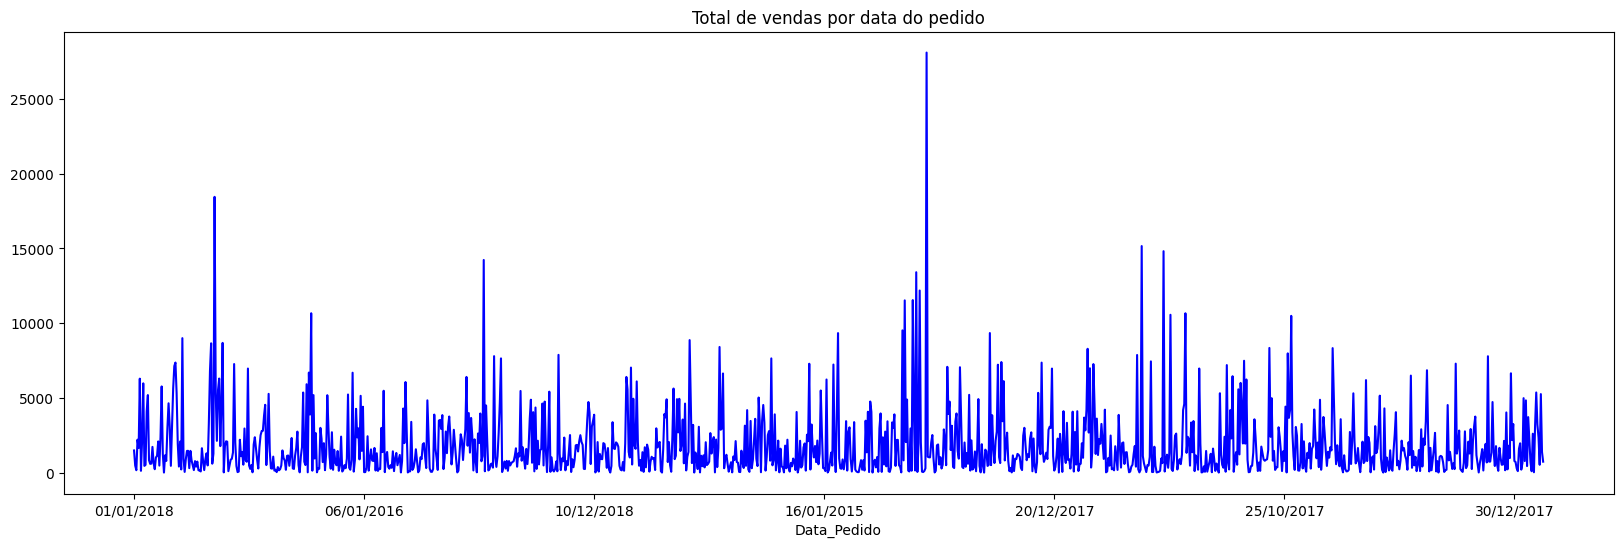

In [78]:
# Plot
plt.figure(figsize = (20, 6))
df_pergunta2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'blue')
plt.title("Total de vendas por data do pedido")
plt.show()

## Pergunta de Negócio 3:
    Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

In [97]:
# Filtro
df_pergunta3 = dados.groupby('Estado')['Valor_Venda'].sum().reset_index() # "reset_index" Criar uma fatia reordenada do dataframe, sem ele o gráfico não plota

In [98]:
df_pergunta3.head(3)

,Estado,Valor_Venda
0,Alabama,19510.640
1,Arizona,35272.657
2,Arkansas,11673.830


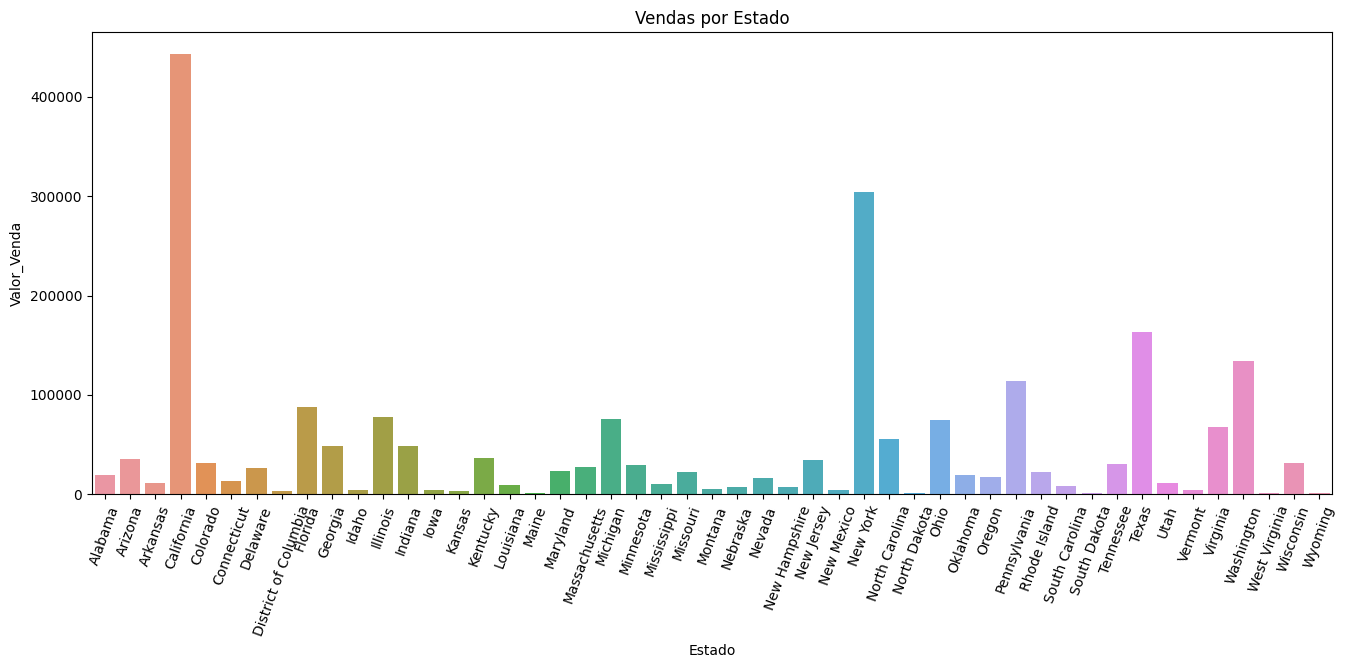

In [99]:
plt.figure(figsize = (16, 6))
sns.barplot(data = df_pergunta3, x = 'Estado', y = 'Valor_Venda').set(title = 'Vendas por Estado')
plt.xticks(rotation = 70)
plt.show()

## Pergunta de Negócio 4:
    Quais São as 10 Cidades com Maior Total de Vendas?Demonstre o resultado através de um gráfico de barras.

## Pergunta de Negócio 5:
    Qual Segmento Teve o Maior Total de Vendas?Demonstre o resultado através de um gráfico de pizza.

## Pergunta de Negócio 6 (Desafio Nível Baby):
    Qual o Total de Vendas Por Segmento e Por Ano?

## Pergunta de Negócio 7 (Desafio Nível Júnior):
    Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:

    Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
    Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

Quantas Vendas Receberiam 15% de Desconto?

## Pergunta de Negócio 8 (Desafio Nível Master):
    Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):
    Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha.

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):
    Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?Demonstre tudo através de um único gráfico.